In [ ]:
#Mount gdrive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import numpy as np
# sgen_p, load_p, load_q
X_train = np.load("/content/gdrive/MyDrive/X_train.npy")
X_test = np.load("/content/gdrive/MyDrive/X_test.npy")
# line loading results
y_train = np.load("/content/gdrive/MyDrive/y_train.npy")
y_test = np.load("/content/gdrive/MyDrive/y_test.npy")

In [ ]:
from sklearn.preprocessing import StandardScaler
#Scale target variable
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)

In [ ]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(verbose=1)
#Train the MLP model (10% of power flow data)
ann.fit(X_train, y_train)
#Model prediction (90% of power flow data)
y_predict = ann.predict(X_test)
y_predict = scaler.inverse_transform(y_predict)

Iteration 1, loss = 0.47355897
Iteration 2, loss = 0.20460359
Iteration 3, loss = 0.11964404
Iteration 4, loss = 0.09332966
Iteration 5, loss = 0.07786136
Iteration 6, loss = 0.06757676
Iteration 7, loss = 0.05944574
Iteration 8, loss = 0.05272857
Iteration 9, loss = 0.04722607
Iteration 10, loss = 0.04249257
Iteration 11, loss = 0.03864626
Iteration 12, loss = 0.03524545
Iteration 13, loss = 0.03210617
Iteration 14, loss = 0.03004478
Iteration 15, loss = 0.02729096
Iteration 16, loss = 0.02511379
Iteration 17, loss = 0.02388387
Iteration 18, loss = 0.02169789
Iteration 19, loss = 0.02014893
Iteration 20, loss = 0.01887968
Iteration 21, loss = 0.01787055
Iteration 22, loss = 0.01672070
Iteration 23, loss = 0.01564493
Iteration 24, loss = 0.01515946
Iteration 25, loss = 0.01488077
Iteration 26, loss = 0.01379992
Iteration 27, loss = 0.01311246
Iteration 28, loss = 0.01254214
Iteration 29, loss = 0.01220466
Iteration 30, loss = 0.01158351
Iteration 31, loss = 0.01130444
Iteration 32, los

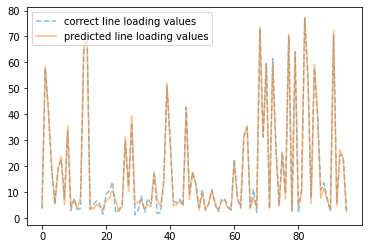

In [ ]:
import matplotlib.pyplot as plt

#Plot predictions
plt.plot(y_test[:96, 53], alpha=.5, linestyle="--", label="correct line loading values")
plt.plot(y_predict[:96, 53], alpha=.5, linestyle="-", label="predicted line loading values")
plt.legend()
plt.show()

In [ ]:
#Model Evaluation

from sklearn.metrics import mean_squared_error

#Mean squared error
mse = mean_squared_error(y_test,  y_predict)
print(f"the error is only {mse:.2f}%")

from time import  time

#Inference time
t0 = time()
y_predict = ann.predict(X_test)
t1 = time() - t0
print(f"ANN time: {t1:.2f}")

the error is only 0.09%
ANN time: 0.13
